In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import datetime as dt

from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

seaborn.set_context('talk')
# Set float format
pd.set_option('display.float_format','{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

# Set style
seaborn.set_style("darkgrid")
seaborn.set_palette('pastel')
seaborn.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

In [4]:
curated_pkl = pd.read_pickle('curated_df.pkl')

In [5]:
curated_pkl.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032.00,Service Station,0.06,0.00
2021-01-01 00:05:00,477,VP Nafta,15032.00,Service Station,0.06,0.00
2021-01-01 00:10:00,477,VP Nafta,15032.00,Service Station,0.06,0.00
2021-01-01 00:15:00,477,VP Nafta,15032.00,Service Station,0.06,0.00
2021-01-01 00:20:00,477,VP Nafta,15032.00,Service Station,0.06,0.00


In [7]:
df=curated_pkl.copy()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936340 entries, 2021-01-01 00:00:00 to 2021-03-31 23:30:00
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id_equipo        object
 1   nombre_producto  object
 2   capacidad        object
 3   industria        object
 4   volumen_escl     object
 5   consumo_escl     object
dtypes: object(6)
memory usage: 210.2+ MB


In [31]:
df["volumen_escl"]=df.volumen_escl.astype("float64")

In [32]:
df["consumo_escl"]=df.consumo_escl.astype("float64")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936340 entries, 2021-01-01 00:00:00 to 2021-03-31 23:30:00
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_equipo        object 
 1   nombre_producto  object 
 2   capacidad        object 
 3   industria        object 
 4   volumen_escl     float64
 5   consumo_escl     float64
dtypes: float64(2), object(4)
memory usage: 210.2+ MB


In [34]:
df_520=df[df["id_equipo"]=="520"]

In [35]:
df_520.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:05:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:10:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:15:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:20:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00


In [36]:
df_520.nombre_producto.value_counts()

ULTRA DIESEL    25915
DIESEL EURO     25915
Name: nombre_producto, dtype: int64

In [37]:
df_520[df_520["nombre_producto"]=="ULTRA DIESEL"]

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,520,ULTRA DIESEL,82868.00,Transportation,0.44,0.00
2021-01-01 00:05:00,520,ULTRA DIESEL,82868.00,Transportation,0.44,0.00
2021-01-01 00:10:00,520,ULTRA DIESEL,82868.00,Transportation,0.44,0.00
2021-01-01 00:15:00,520,ULTRA DIESEL,82868.00,Transportation,0.44,0.00
2021-01-01 00:20:00,520,ULTRA DIESEL,82868.00,Transportation,0.44,0.00
...,...,...,...,...,...,...
2021-03-31 23:10:00,520,ULTRA DIESEL,82868.00,Transportation,0.39,0.00
2021-03-31 23:15:00,520,ULTRA DIESEL,82868.00,Transportation,0.39,0.00
2021-03-31 23:20:00,520,ULTRA DIESEL,82868.00,Transportation,0.39,0.00


In [52]:
df_520[df_520["nombre_producto"]=="DIESEL EURO"]

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:05:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:10:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:15:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
2021-01-01 00:20:00,520,DIESEL EURO,41434.00,Transportation,0.21,0.00
...,...,...,...,...,...,...
2021-03-31 23:10:00,520,DIESEL EURO,41434.00,Transportation,0.40,0.00
2021-03-31 23:15:00,520,DIESEL EURO,41434.00,Transportation,0.40,0.00
2021-03-31 23:20:00,520,DIESEL EURO,41434.00,Transportation,0.40,0.00


### Inventario

In [55]:
data_month=df_520.loc[:"2021-01-31 00:00:00"]
data_week=df_520.loc[:"2021-01-7 00:00:00"]
data_day=df_520.loc[:"2021-01-2 00:00:00"]

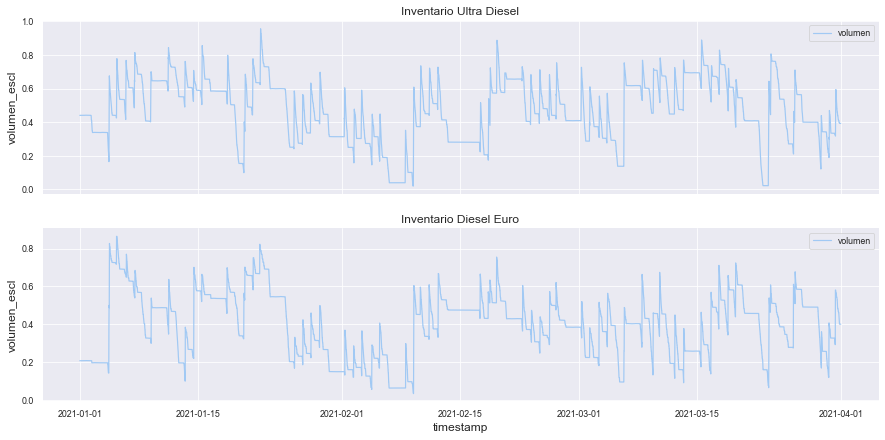

In [70]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 7))
sns.lineplot(
    data=df_520[df_520["nombre_producto"]=="ULTRA DIESEL"], y='volumen_escl', x='timestamp', 
    label='volumen', ax=axes[0]
)
sns.lineplot(
    data=df_520[df_520["nombre_producto"]=="DIESEL EURO"], y='volumen_escl', x='timestamp', 
    label='volumen',  ax=axes[1]
)
axes[0].set_title('Inventario Ultra Diesel')
axes[1].set_title('Inventario Diesel Euro')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

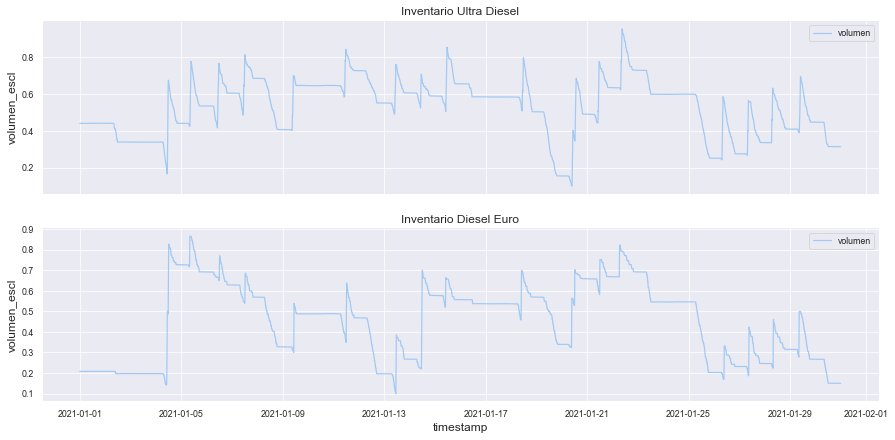

In [71]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 7))
sns.lineplot(
    data=data_month[data_month["nombre_producto"]=="ULTRA DIESEL"], y='volumen_escl', x='timestamp', 
    label='volumen', ax=axes[0]
)
sns.lineplot(
    data=data_month[data_month["nombre_producto"]=="DIESEL EURO"], y='volumen_escl', x='timestamp', 
    label='volumen',  ax=axes[1]
)
axes[0].set_title('Inventario Ultra Diesel')
axes[1].set_title('Inventario Diesel Euro')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

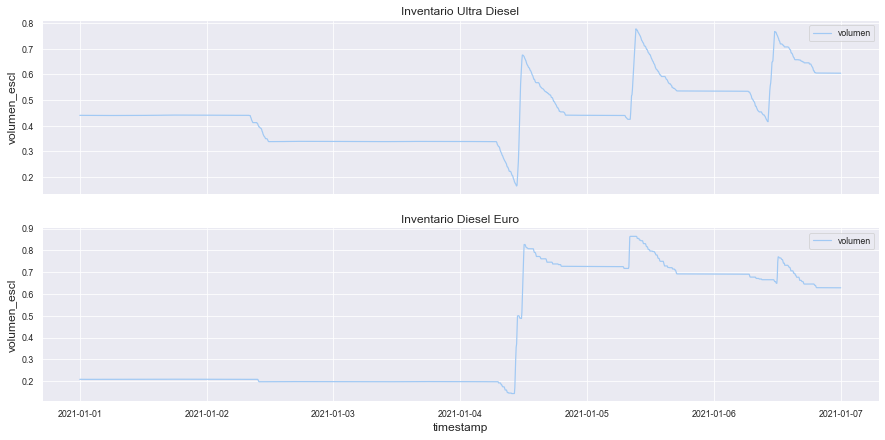

In [72]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 7))
sns.lineplot(
    data=data_week[data_week["nombre_producto"]=="ULTRA DIESEL"], y='volumen_escl', x='timestamp', 
    label='volumen', ax=axes[0]
)
sns.lineplot(
    data=data_week[data_week["nombre_producto"]=="DIESEL EURO"], y='volumen_escl', x='timestamp', 
    label='volumen',  ax=axes[1]
)
axes[0].set_title('Inventario Ultra Diesel')
axes[1].set_title('Inventario Diesel Euro')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

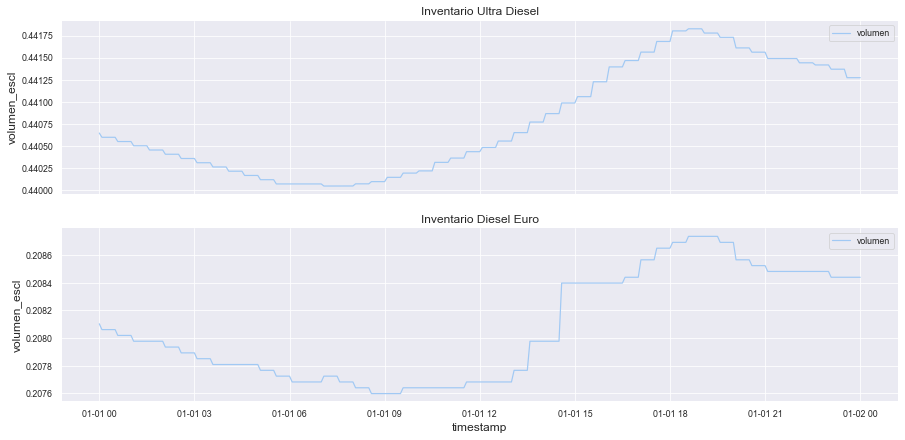

In [73]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 7))
sns.lineplot(
    data=data_day[data_day["nombre_producto"]=="ULTRA DIESEL"], y='volumen_escl', x='timestamp', 
    label='volumen', ax=axes[0]
)
sns.lineplot(
    data=data_day[data_day["nombre_producto"]=="DIESEL EURO"], y='volumen_escl', x='timestamp', 
    label='volumen',  ax=axes[1]
)
axes[0].set_title('Inventario Ultra Diesel')
axes[1].set_title('Inventario Diesel Euro')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

### Consumo

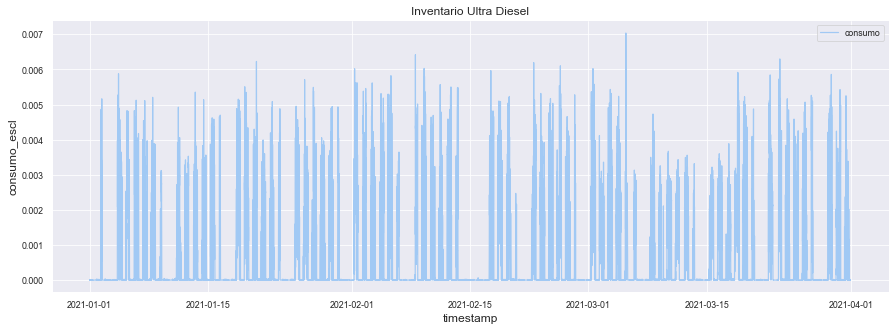

In [44]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df_520[df_520["nombre_producto"]=="ULTRA DIESEL"], y='consumo_escl', x='timestamp', 
    label='consumo'
)
plt.title('Inventario Ultra Diesel')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

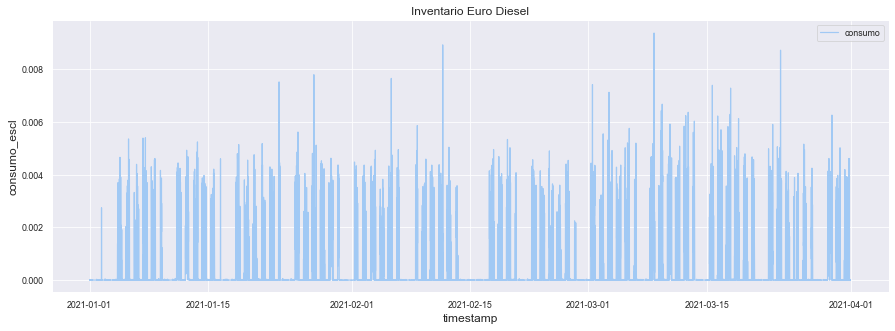

In [45]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df_520[df_520["nombre_producto"]=="DIESEL EURO"], y='consumo_escl', x='timestamp', 
    label='consumo'
)
plt.title(f'Inventario Euro Diesel')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
diesel_ultra=df_520[df_520["nombre_producto"]=="ULTRA DIESEL"]

diesel_euro=df_520[df_520["nombre_producto"]=="DIESEL EURO"]

<ipython-input-77-53f1e926ddb9>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(diesel_ultra[column], freq=60*24, model='additive', extrapolate_trend='freq')
<ipython-input-77-53f1e926ddb9>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(diesel_ultra[column], freq=60*24, model='additive', extrapolate_trend='freq')


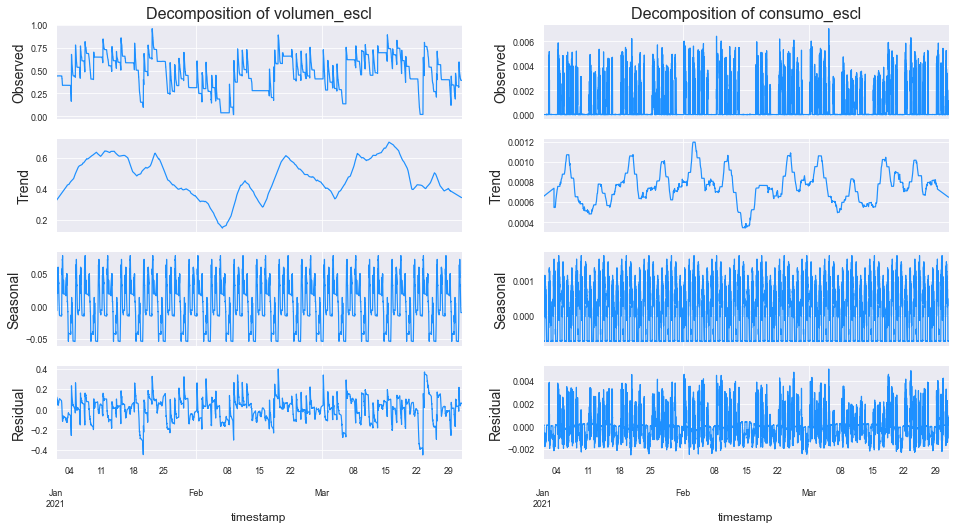

In [77]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['volumen_escl', 'consumo_escl']):
    
    res = seasonal_decompose(diesel_ultra[column], freq=60*24, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

<ipython-input-78-88c0ecf45db4>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(diesel_euro[column], freq=60*24, model='additive', extrapolate_trend='freq')
<ipython-input-78-88c0ecf45db4>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(diesel_euro[column], freq=60*24, model='additive', extrapolate_trend='freq')


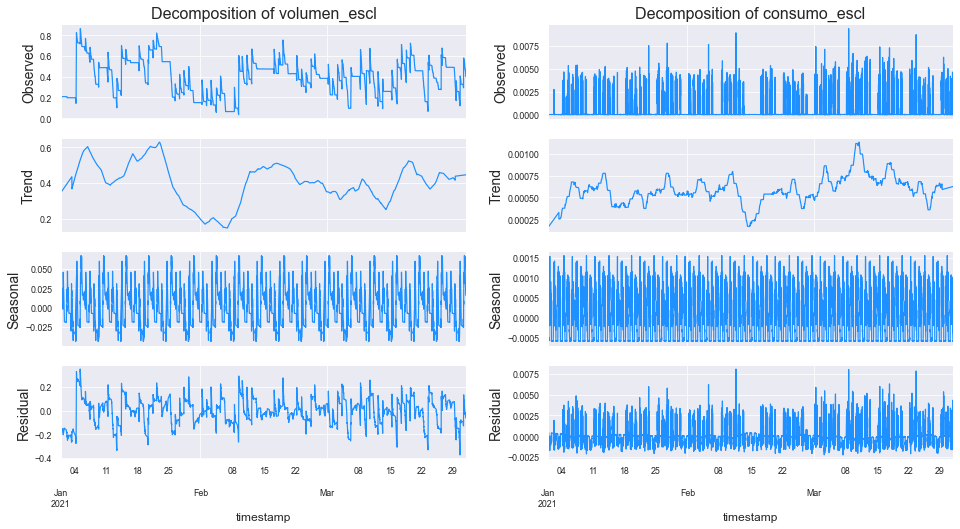

In [78]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['volumen_escl', 'consumo_escl']):
    
    res = seasonal_decompose(diesel_euro[column], freq=60*24, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)